In [4]:
#A and B

In [5]:
from numpy import random, int32
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import pandas as pd

### Part A

In [7]:
num_cmp = 0

def insertionSort(arr, left, right):
    """Function to perform Insertion Sort"""
    global num_cmp
    for i in range(left + 1, right +     1):
        key = arr[i]
        j = i - 1

        while j >= left:
            num_cmp += 1 # num_cmp is incremented here
            if key >= arr[j]:
                 break
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return num_cmp

def mergeSort(arr, left, mid, right):
    """Function to merge two sorted halves"""
    n1 = mid - left + 1
    n2 = right - mid
    global num_cmp

    # Create temporary arrays
    L = arr[left:mid+1]
    R = arr[mid+1:right+1]

    # Merge the temp arrays back into arr[left..right]
    i = 0
    j = 0
    k = left
    while i < len(L) and j < len(R):
        num_cmp += 1 # num_cmp is incremented here
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if any
    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if any
    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

def hybridSort(S_value, arr, left, right):
    """Function to implement the hybrid Merge-Insertion Sort"""
    if right - left + 1 <= S_value:
        # If subarray size is less than or equal to S, use Insertion Sort
        return insertionSort(arr, left, right)
    else:
        # Otherwise, use Merge Sort
        mid = left + (right - left) // 2

        # Recursively sort the two halves
        hybridSort(S_value, arr, left, mid)
        hybridSort(S_value, arr, mid + 1, right)

        # Merge the sorted halves
        mergeSort(arr, left, mid, right)

### Part B

In [8]:
def generate_random_array(n, max_value):
    """Function to generate a random array"""
    #n = array size to generate, max_value = max value in the array, x 
    return [random.randint(0, max_value) for _ in range(n)]

*Fixed x value at 10,000

In [9]:
#checking if the code works

def print_array(arr):
    """Function to print the array"""
    print(" ".join(map(str, arr)))
    
#Main code to print array
    # Generate a random array
arr = generate_random_array(10000, 10000)

# Print the original array
print("Original array: ")
print_array(arr)

# Apply hybrid merge sort
hybridSort(10,arr, 0, len(arr) - 1)

# Print the sorted array
print("Sorted array: ")
print_array(arr)
print("Number of comparisons: ", num_cmp)


Original array: 
5155 8888 1595 1730 6259 2252 3974 5960 260 4813 5135 5285 8613 6410 4756 7209 7499 151 5145 2152 5731 9441 2622 7212 6701 9121 1338 9058 4830 64 7628 8093 8803 1048 3059 7906 6496 7207 1394 9686 3725 9933 3095 3396 731 6099 69 415 2175 215 8870 9060 6928 6916 9022 796 4601 9716 228 9533 28 6795 5326 1470 7677 9809 2822 9117 4632 9737 1805 8109 4053 9538 3438 9663 8880 9086 4751 1032 5841 4876 7030 1936 7470 5798 534 2433 3475 4645 586 6875 6500 2644 1247 2442 3526 7465 5021 7802 9780 927 8252 2756 3277 6357 9958 4655 5402 3182 7769 7369 1011 4464 3396 7231 902 2246 9198 1021 7982 5723 7275 973 3399 8687 9052 383 5295 304 9015 1956 1088 2646 7410 7094 2793 838 4223 1577 5216 3411 170 9503 7528 1149 5075 8240 581 8145 3461 3775 8960 3203 6192 1886 8668 6701 7238 5046 3189 3117 1978 4692 8110 1332 6216 3537 9339 5295 7257 4448 7023 5336 6908 4666 3681 4352 7640 8153 1147 3092 9253 9719 926 8355 5936 3973 5541 2189 8711 6163 4920 4143 9357 2232 5907 6776 9305 3694 5011 32

### Part C

c.i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity. 

*Given that S value is fixed to 15.

In [10]:
def log_10(n): # Apply log base 10 to the x-axis
    return np.log2(n) / np.log2(10)

def theoretical_complexity(n):
    return n * 15 + n * np.log2(n / 15)

Array Size: 1000 
 Number of comparisons:  9568
Array Size: 10000 
 Number of comparisons:  127270
Array Size: 100000 
 Number of comparisons:  1638618
Array Size: 1000000 
 Number of comparisons:  19883491
Array Size: 10000000 
 Number of comparisons:  226410775
Theoretical Array Size: 1000 
 Number of comparisons:  21058.89368905357
Theoretical Array Size: 10000 
 Number of comparisons:  243808.2178394093
Theoretical Array Size: 100000 
 Number of comparisons:  2770274.9878828293
Theoretical Array Size: 1000000 
 Number of comparisons:  31024677.973715656
Theoretical Array Size: 10000000 
 Number of comparisons:  343466060.68603015


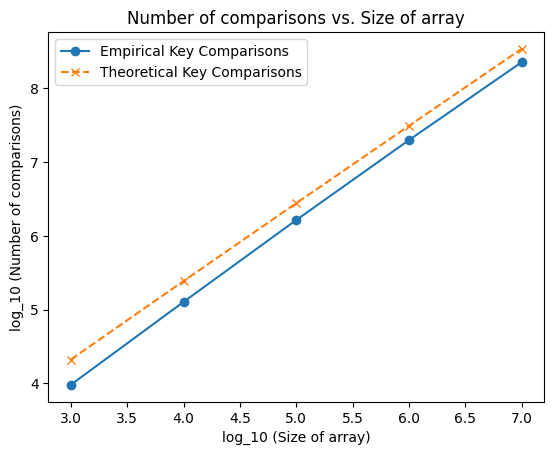

In [11]:
arr_num_cmp = [0] * 5
arr_num_theory = [0] * 5
arr_size = [0] * 5

for i in range(1,6):
    num_cmp = 0
    arr = generate_random_array(10**(i+2), 10000)
    hybridSort(15, arr, 0, len(arr) - 1)
    arr_num_cmp[i-1] = num_cmp
    arr_size[i-1] = 10**(i+2)
    print("Array Size:", 10**(i+2),"\n" ,"Number of comparisons: ", num_cmp)

#theoretical analysis
# O(N[K+log(N/K)])
for i in range(1,6):
    arr_num_theory[i-1] = theoretical_complexity(10**(i+2))
    print("Theoretical Array Size:", 10**(i+2),"\n" ,"Number of comparisons: ", theoretical_complexity(10**(i+2)))

# Plot empirical data
plt.plot(log_10(arr_size), log_10(arr_num_cmp), marker='o', label='Empirical Key Comparisons')

# Plot theoretical data
plt.plot(log_10(arr_size), log_10(arr_num_theory), marker='x', linestyle='--', label='Theoretical Key Comparisons')


# Labels and title
plt.xlabel('log_10 (Size of array)')
plt.ylabel('log_10 (Number of comparisons)')
plt.title('Number of comparisons vs. Size of array')

# Add a legend
plt.legend()

# Display the graph
plt.show()


c.ii) With the input size n (for the array) fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity. 

*Given that input array size is fixed at 10,000

S Value: 1 
 Number of comparisons:  120446
S Value: 2 
 Number of comparisons:  120381
S Value: 3 
 Number of comparisons:  120486
S Value: 4 
 Number of comparisons:  120594
S Value: 5 
 Number of comparisons:  121495
S Value: 6 
 Number of comparisons:  121380
S Value: 7 
 Number of comparisons:  121558
S Value: 8 
 Number of comparisons:  121519
S Value: 9 
 Number of comparisons:  122470
S Value: 10 
 Number of comparisons:  127183
S Value: 11 
 Number of comparisons:  126889
S Value: 12 
 Number of comparisons:  127021
S Value: 13 
 Number of comparisons:  127244
S Value: 14 
 Number of comparisons:  127057
S Value: 15 
 Number of comparisons:  127325
S Value: 16 
 Number of comparisons:  126953
S Value: 17 
 Number of comparisons:  126968
S Value: 18 
 Number of comparisons:  126966
S Value: 19 
 Number of comparisons:  134031
S Value: 20 
 Number of comparisons:  143477
S Value: 21 
 Number of comparisons:  143400
S Value: 22 
 Number of comparisons:  143382
S Value: 23 
 Numbe

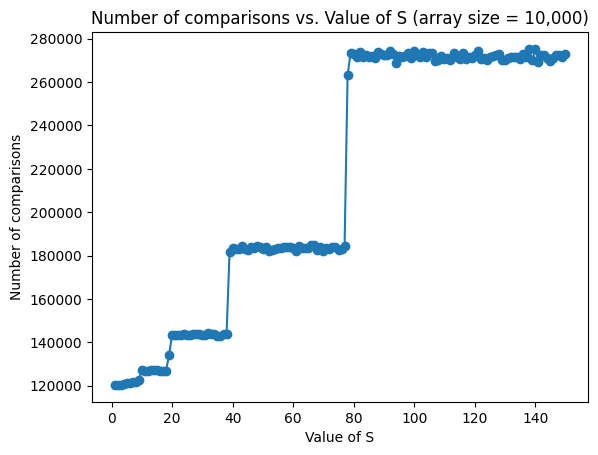

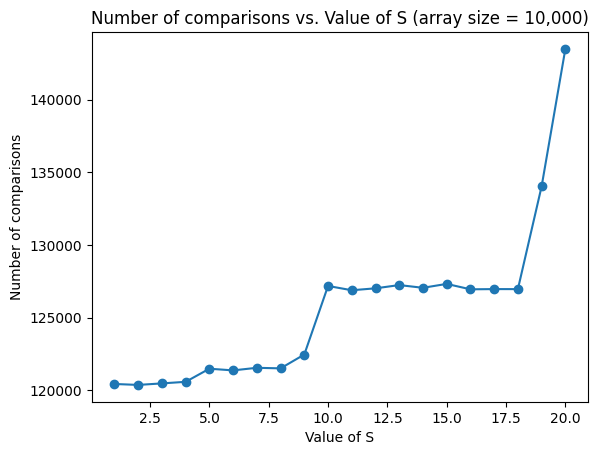

In [8]:
S_values = [s for s in range(1, 151,1)]
arr_num_cmp = [0] * len(S_values)
arr = generate_random_array(10000, 10000)

for s in range(1,151):
    num_cmp = 0
    arr = generate_random_array(10000, 10000)
    hybridSort(s, arr, 0, len(arr) - 1)
    print("S Value:",s ,"\n" ,"Number of comparisons: ", num_cmp)
    arr_num_cmp[s-1] = num_cmp

plt.plot(S_values, arr_num_cmp, marker='o')
plt.xlabel('Value of S')
plt.ylabel('Number of comparisons')
plt.title('Number of comparisons vs. Value of S (array size = 10,000)')
plt.show()

plt.plot(S_values[0:20], arr_num_cmp[0:20], marker='o')
plt.xlabel('Value of S')
plt.ylabel('Number of comparisons')
plt.title('Number of comparisons vs. Value of S (array size = 10,000)')
plt.show()

c.iii) Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

*Range of S values based on the c.ii number of comparison is the least when the value of S ranges from 1 to 20 

In [9]:
S_values = [s for s in range(1, 21)]
arr_time = [0] * len(S_values)

for s in range(1, 21):
    total_time = 0
    print("\nS Value: ", s)
    
    # Loop through different array sizes (10^3 and 10^4)
    for i in range(1, 6):
        num_cmp = 0
        arr = generate_random_array(10**(i+2), 10000)
        
        start_time = time.time()
        hybridSort(s, arr, 0, len(arr) - 1)
        end_time = time.time()
        
        total_time += end_time - start_time
        
        print("Array size:", 10**(i+2), " Number of comparisons: ", num_cmp)
    
    arr_time[s-1] = total_time / 4
    print("\nAverage time:", arr_time[s-1], "seconds for S =", s)


min_avg_time = min(arr_time)
op_s_value = S_values[arr_time.index(min_avg_time)]

print("\nMinimum average time:", min_avg_time, " Optimal S =", op_s_value)



S Value:  1
Array size: 1000  Number of comparisons:  8720
Array size: 10000  Number of comparisons:  120547
Array size: 100000  Number of comparisons:  1536547
Array size: 1000000  Number of comparisons:  18674436
Array size: 10000000  Number of comparisons:  220100586

Average time: 14.365754544734955 seconds for S = 1

S Value:  2
Array size: 1000  Number of comparisons:  8707
Array size: 10000  Number of comparisons:  120378
Array size: 100000  Number of comparisons:  1536198
Array size: 1000000  Number of comparisons:  18673497
Array size: 10000000  Number of comparisons:  220097851

Average time: 13.717915952205658 seconds for S = 2

S Value:  3
Array size: 1000  Number of comparisons:  8706
Array size: 10000  Number of comparisons:  120449
Array size: 100000  Number of comparisons:  1536207
Array size: 1000000  Number of comparisons:  18673216
Array size: 10000000  Number of comparisons:  220096162

Average time: 14.051843702793121 seconds for S = 3

S Value:  4
Array size: 100

### Part D 
Compare with original Mergesort: Implement the original version of
Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on
the dataset with 10 million integers. You can use the optimal value of S obtained
in (c) for this task.

In [10]:
merge_key = 0

def merge(arr, left, mid, right):
    global merge_key
    n1 = mid - left + 1
    n2 = right - mid

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(n1):
        L[i] = arr[left + i]
    for j in range(n2):
        R[j] = arr[mid + 1 + j]

    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = left  # Initial index of merged subarray

    # Merge the temp arrays back
    # into arr[left..right]
    while i < n1 and j < n2:
        merge_key+=1
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[],
    # if there are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], 
    # if there are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

In [11]:
#Original Merge Sort
def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2

        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

In [15]:
#Comparing the keyComparisons and CPU time
optimal_s = 10
num_cmp = 0
arr_cpu_time = [0] * 2
arr = generate_random_array(10**7, 10000)

# Measure process time for Merge Sort
start_time = time.process_time()
merge_sort(arr, 0, len(arr) - 1)
end_time = time.process_time()
arr_cpu_time[0] = end_time - start_time  # CPU time for Merge Sort

# Measure process time for Hybrid Sort
start_time = time.process_time()
hybridSort(optimal_s, arr, 0, len(arr) - 1)
end_time = time.process_time()
arr_cpu_time[1] = end_time - start_time  # CPU time for Hybrid Sort

# Print results
print("S Value:", optimal_s)
print("Array size:", 10**7)
print("Number of comparisons for MergeSort: ", merge_key)
print("Number of comparisons for HybridSort: ", num_cmp)

print("\nMerge Sort")
print("Number of comparisons:", merge_key)
print("CPU time :", arr_cpu_time[0], "seconds")

print("\nHybrid Sort")
print("Number of comparisons:", num_cmp)
print("CPU time :", arr_cpu_time[1], "seconds")


S Value: 10
Array size: 10000000
Number of comparisons for MergeSort:  440194118
Number of comparisons for HybridSort:  109273920

Merge Sort
Number of comparisons: 440194118
CPU time : 60.640625 seconds

Hybrid Sort
Number of comparisons: 109273920
CPU time : 36.609375 seconds


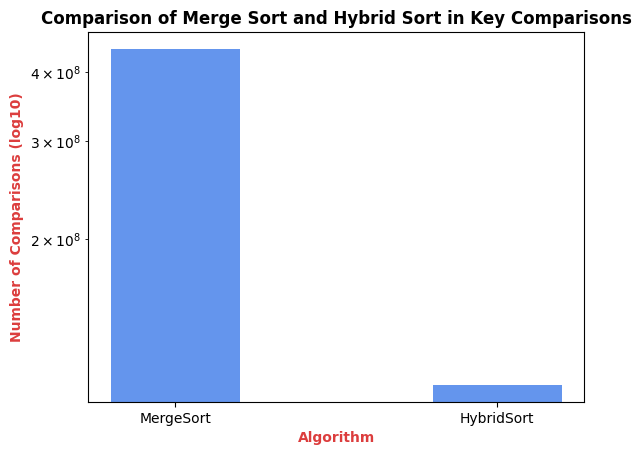

In [16]:
# Plotting the difference in key comparisons
fig, ax1 = plt.subplots()

# Bar chart for key comparisons
bars = ax1.bar(["MergeSort", "HybridSort"], [merge_key, num_cmp], width=0.4, color='#6495ED')
ax1.set_xlabel('Algorithm', color='#dc3d3d',  fontdict={'fontweight': 'bold'})
ax1.set_ylabel('Number of Comparisons (log10)', color='#dc3d3d',  fontdict={'fontweight': 'bold'})
ax1.set_title('Comparison of Merge Sort and Hybrid Sort in Key Comparisons',  fontdict={'fontweight': 'bold'})
ax1.set_yscale('log')

Text(0.5, 1.0, 'Comparison of Merge Sort and Hybrid Sort in CPU Time')

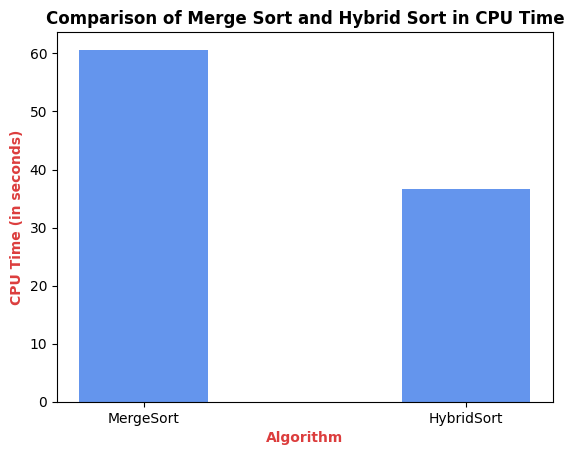

In [17]:
# Plotting the CPU time
fig, ax1 = plt.subplots()

# Bar chart for key comparisons
bars = ax1.bar(["MergeSort", "HybridSort"], [arr_cpu_time[0],arr_cpu_time[1]], width=0.4, color='#6495ED')#ax1.bar(x - 0.2, df.loc[df['Algorithm'] == 'MergeSort', 'HybridSort'], [merge_key, num_cmp], width=0.4, color='b')
ax1.set_xlabel('Algorithm', color='#dc3d3d',  fontdict={'fontweight': 'bold'})
ax1.set_ylabel('CPU Time (in seconds)', color='#dc3d3d',  fontdict={'fontweight': 'bold'})
ax1.set_title('Comparison of Merge Sort and Hybrid Sort in CPU Time',  fontdict={'fontweight': 'bold'})